# MNIST dataset
> <span style="color:gray">
Original [Theano/Lasagne tutorial](https://github.com/DeepLearningDTU/nvidia_deep_learning_summercamp_2016/blob/master/lab1/lab1_FFN.ipynb) by 
Lars Maaløe ([larsmaaloee](https://github.com/larsmaaloee)),
Søren Kaae Sønderby ([skaae](https://github.com/skaae)), and 
Casper Sønderby ([casperkaae](https://github.com/casperkaae)). 
Converted to TensorFlow by 
Alexander R. Johansen ([alrojo](https://github.com/alrojo)), 
and updated by 
Toke Faurby ([faur](https://github.com/Faur)) and 
Mikkel Vilstrup ([mvilstrup](https://github.com/MVilstrup)).
</span>

In this notebook we will guide you through building a neural network classifier for the (in)famous MNIST dataset.
MNIST is a dataset that is often used for benchmarking, consisting of 70.000 image-label paris of handwritten digits from 0-9.
During the notebook we have provided a program skeleton and severalt tips to help guid you through it.
Further more the task is quite similar to what you did in the previous notebook, so you should reffer to it in order to remind yourself about the implementation.

Along the way you will also learn about 
* selecting nonlinearity, and
* stochastic gradient descent with mini-batches.

We will implement a dense feedforward neural network (just like before).
In this setting we represent each image as a vector, instead of a 2D map.
We therefore lose the spatial information of the images.
The ordering of the pixels in the vector does not matter, so we could permutate all images using the same permutation and still get the same performance.
This task is therefore called the _permutation invariant_ MNIST.
Obviously this throws away a lot of structure in the data that could have been used.
Later we will see how spatial information can be included, by using the convolutional neural network architecture.


## Implementation Rules

In this exercise we want you to get some experience with setting up training for yourself, and we therefore want you to implement the training loop yourself.
You are therefore **NOT** allowed to use the `keras.models.Sequential.fit` function.
The `Sequential` model, or built in layers, such as `keras.layers.Dense` are allowed, as long as you define the training ops and training loop yourself.
(If are having problems using `keras.layers` have a look at the [Keras as a simplified interface to TensorFlow](https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html) tutorial).


In [21]:
from __future__ import absolute_import, division, print_function 

import os
import sys
sys.path.append(os.path.join('.', '..')) 
import utils
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


## The MNIST dataset
The 70,000 images-label pairs are split into a 
* 55,000 images training set, 
* 5,000 images validation set and 
* 10,000 images test set.

The images are 28x28 pixels, where each pixel represents the light intensity normalised value between 0-1 (0=black, 1=white).
The number of features is therefore 28x28=784.

First let's load the MNIST dataset and plot a few examples. TensorFlow has a [convenient MNIST interface](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py) that we will use to download and manage the data.

In [22]:
# Load data (download if you haven't already)
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('MNIST_data', 
                                       one_hot=True,   # Convert the labels into one hot encoding
                                       dtype='float32' # rescale images to `[0, 1]`
                                      )

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Information on dataset
----------------------
Training size:	 55000
Test size	 10000
Validation size	 5000

Data summaries
Image shape		 784
Image type		 <class 'numpy.float32'>
Image min/max value	 0.0 / 1.0
Label shape		 10
Label type		 <class 'numpy.float64'>


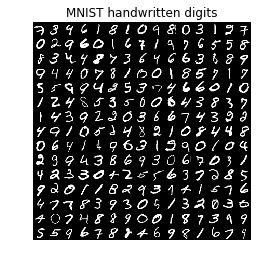

In [23]:
## Print dataset statistics and visualize
print("""Information on dataset
----------------------""")
print("Training size:\t", mnist_data.train.num_examples)
print("Test size\t", mnist_data.test.num_examples)
print("Validation size\t", mnist_data.validation.num_examples)

num_features = mnist_data.train.images[0].shape[0]
num_classes = mnist_data.train.labels[0].shape[0]

print('\nData summaries')
print("Image shape\t\t", num_features)
print("Image type\t\t", type(mnist_data.train.images[0][0]))
print("Image min/max value\t", np.min(mnist_data.train.images), '/', np.max(mnist_data.train.images))
print("Label shape\t\t", num_classes)
print("Label type\t\t", type(mnist_data.train.labels[0][0]))


## Plot a few MNIST examples
img_to_show = 15
idx = 0
canvas = np.zeros((28*img_to_show, img_to_show*28))
for i in range(img_to_show):
    for j in range(img_to_show):
        canvas[i*28:(i+1)*28, j*28:(j+1)*28] = mnist_data.train.images[idx].reshape((28, 28))
        idx += 1
plt.figure(figsize=(4,4))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()


## Creating the graph

#### <span style="color:red"> EXE 1) Defining the network
</span>

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* Define two layers. Remember to give them proper names.
    * Try some different nonlinearities, and compare their performance
* The non-linearity of the output layer should be softmax ([tf.nn.softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax))


In [39]:
## Build the network
tf.reset_default_graph()

## Define placeholders
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
y_pl = tf.placeholder(tf.float64, [None, num_classes], name='yPlaceholder')
# Depending on your implementation you might need to cast y_pl differently
y_pl = tf.cast(y_pl, tf.float32)

## Define the model

### YOUR CODE HERE ###

layer1_neurons = 30

weight_initializer = tf.truncated_normal_initializer(stddev=0.1) # define the weights initi

### Create layer 1 

with tf.variable_scope('layer1'): 
    W_1 = tf.get_variable('W', [num_features, layer1_neurons], 
                          initializer=weight_initializer)
    b_1 = tf.get_variable('b', [layer1_neurons], 
                          initializer=tf.constant_initializer(0.0))
    with tf.variable_scope('output1'):
        
        l_1 = tf.matmul(x_pl, W_1) + b_1 
        l_1 = tf.nn.relu(l_1) 
        
        
with tf.variable_scope('layer2'):
    W_2 = tf.get_variable('W', [layer1_neurons, num_classes],
                          initializer=weight_initializer)
    b_2 = tf.get_variable('b', [num_classes], 
                          initializer=tf.constant_initializer(0.0))
    with tf.variable_scope('output2'):
        
        l_2 = tf.matmul(l_1, W_2) + b_2 
        
z = tf.nn.softmax(l_2)


#### <span style="color:red"> EXE 2) Defining the training operations.
</span>

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* Cross_entropy loss
* An optimizer and training op
* An op computing the accuracy

In [40]:
### Implement training ops

### YOUR CODE HERE ###
# 1) Define cross entropy loss

with tf.variable_scope('loss'):
    # computing cross entropy per sample
    cross_entropy = -tf.reduce_sum(y_pl * tf.log(z), reduction_indices=[1])
    # Average over samples
    cross_entropy = tf.reduce_mean(cross_entropy)
    
# 2) Define the training op

with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

    # Computing our gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)

    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)
    #train_op = tf.train.GradientDescentOptimizer(0.4).minimize(cross_entropy)


# 3) Define accuracy op

with tf.variable_scope('performance'):
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = tf.equal(tf.argmax(z, axis=1), tf.argmax(y_pl, axis=1))

    # averaging the one-hot encoded vector
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Stochastic gradient descent with mini-batches

In the last notebook we used the entire dataset to compute every parameter update.
For large datasets this is very costly and inefficient.
Instead we can compute the gradient on only a small subset of the data, a *mini-batches*, and use it to update the parameters.
Bath size varies a lot depending on application but between 8-256 is common.
Bigger is not allways better.
With smaller mini-batch size you get more updates and your model might converge faster.
Also small batchsizes uses less memory -> freeing up memory so you train a model with more parameters.

#### <span style="color:red"> EXE 3) Testing the forward pass
</span>

Before building the training loop lets ensure that the forward pass works.

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* define the `feed_dict`
* pass `x` through the network using `sess.run`

In [41]:
#Test the forward pass
batch_size = 50


# Get a mini-batch
x, y = mnist_data.train.next_batch(batch_size)

# Restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    sess.run(tf.global_variables_initializer())
    
    
    ### YOUR CODE HERE ###
    feed_dict = {x_pl: x}
    y_pred = sess.run(z, feed_dict = feed_dict)
    
        
assert y_pred.shape == y.shape, "ERROR the output shape is not as expected!" \
        + " Output shape should be " + str(y.shape) + ' but was ' + str(y_pred.shape)
    
print(y_pred[1])



[ 0.09411259  0.06675576  0.10168125  0.11403197  0.04701921  0.09836377
  0.12351405  0.1043862   0.08041893  0.16971625]


In [42]:
# display the graph

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))
    utils.show_graph(tmp_def)

# Build the training loop.
We train the network by calculating the gradient w.r.t the cost function and update the parameters in direction of the negative gradient. 


When training neural network you always use mini batches.
Instead of calculating the average gradient using the entire dataset you approximate the gradient using a mini-batch of typically 16 to 256 samples.
The paramters are updated after each mini batch.
Networks converges much faster using minibatches because the paramters are updated more often.



#### <span style="color:red"> EXE 4) Building the training loop.
</span>

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* Perform the training operation
* Collect training statistics
* [Optional] Monitor training in TensorBoard.

In [43]:
#reset training
mnist_data.train._epochs_completed = 0

max_epochs = 5

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

train_cost, val_cost, train_acc, val_acc = [],[],[],[]
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:    
    try:
        sess.run(tf.global_variables_initializer())
        
        while mnist_data.train.epochs_completed < max_epochs:

                # Load one mini-batch
                x, y = mnist_data.train.next_batch(batch_size)

                ### YOUR CODE HERE ###
                # 1) Run the train op

                # deciding which parts to fetch, train_op makes the classifier "train"
                fetches_train = [train_op, cross_entropy, accuracy]
                feed_dict_train = {x_pl: x, y_pl: y}
                #train 
                res = sess.run(fetches_train, feed_dict=feed_dict_train)

                # 2) Compute train_cost, val_cost, train_acc, val_acc
                train_cost += [res[1]]
                train_acc += [res[2]]
                
                               
                            ### VALIDATING ###
                # what to feed our accuracy op
                feed_dict_valid = {x_pl: mnist_data.validation.images, y_pl: mnist_data.validation.labels}

                # deciding which parts to fetch
                fetches_valid = [cross_entropy, accuracy]

                # running the validation
                res = sess.run(fetches=fetches_valid, feed_dict=feed_dict_valid)
                val_cost += [res[0]]
                val_acc += [res[1]]
                    

                
        # classify the images after training
        validation_classifications = sess.run(fetches= z, feed_dict={x_pl: mnist_data.validation.images })



    except KeyboardInterrupt:
        print('KeyboardInterrupt')
        

print('Done')



Done


#### <span style="color:red"> EXE 5) Building the training loop.
</span>

You should have saved training statistics in `train_cost`, `val_cost`, `train_acc`, `val_acc`.
1. Plot train and validation loss as a function of time
2. Plot train and validation accuracy as a function of time
3. Select some random validation images, visualize them, and examine the output of the network.
    * How well does it do? When does it make mistakes?


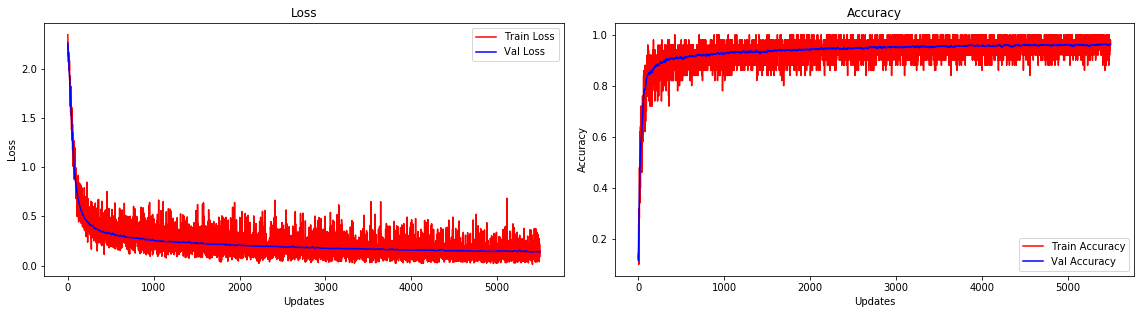

total accuracy: 
0.9624


In [44]:
### YOUR CODE HERE ###
# 1) Plot train and validation loss as a function of time
epoch = np.arange(len(train_cost))
fig = plt.figure(figsize=(16,12))
fig.add_subplot(325)
plt.title('Loss')
plt.plot(epoch, train_cost,'r', label='Train Loss')
plt.plot(epoch, val_cost,'b', label='Val Loss')
plt.legend()
plt.xlabel('Updates'), plt.ylabel('Loss')

# 2) Plot train and validation accuracy as a function of time

fig.add_subplot(326)
plt.title('Accuracy')
plt.plot(epoch, train_acc,'r', label='Train Accuracy')
plt.plot(epoch, val_acc,'b', label='Val Accuracy')
plt.legend(loc=4)
plt.xlabel('Updates'), plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

print("total accuracy: ") 
print(val_acc[-1])
        

In [45]:
# function to find images that did not match the classfier
def find_non_matches(x,y):
    res = []
    for i in range(len(x)):
        if not np.argmax(x[i]) == np.argmax(y[i]):
            res.append(i)
    return (res)

# function to find images that did match the classfier
def find_matches(x,y):
    res = []
    for i in range(len(x)):
        if np.argmax(x[i]) == np.argmax(y[i]):
            res.append(i)
    return (res)

In [46]:
# 3) Select some random validation images, visualize them, and examine the output of the network.

no_match_indexes = find_non_matches(validation_classifications,  mnist_data.validation.labels )
match_indexes = find_matches(validation_classifications, mnist_data.validation.labels )

print("matches:")
print(len(no_match_indexes))
print("non matches:")
print(len(match_indexes))



matches:
188
non matches:
4812


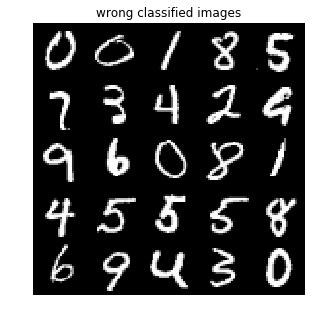

In [47]:
## Plot some worng classified images
img_to_show = 5
idx = 0
canvas = np.zeros((28*img_to_show, img_to_show*28))
for i in range(img_to_show):
    for j in range(img_to_show):
        canvas[i*28:(i+1)*28, j*28:(j+1)*28] = mnist_data.train.images[no_match_indexes[idx]].reshape((28, 28))
        idx += 1
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('wrong classified images')
plt.show()

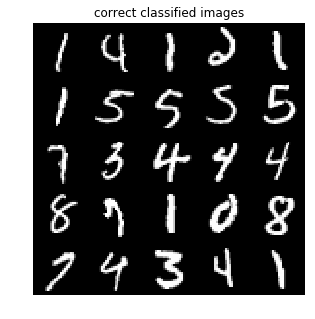

In [48]:
## Plot some correct classified images
img_to_show = 5
idx = 0
canvas = np.zeros((28*img_to_show, img_to_show*28))
for i in range(img_to_show):
    for j in range(img_to_show):
        canvas[i*28:(i+1)*28, j*28:(j+1)*28] = mnist_data.train.images[match_indexes[idx]].reshape((28, 28))
        idx += 1
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('correct classified images')
plt.show()

# Closing Remarks

You have now seen several different ways in which feed forward neural networks can be created.
There is no "right" way to define a neural network.
Ideally you should be able to understand how to implement everything at a low-level, and use high-level APIs to reduce human error and speedup development.
There are numerous frameworks which takes care the fundamental concepts are implemented correctly.
In this class we will mostly use Tensorflow and show Keras implementations here and there.
There are however alternatives that each have their strenghts and weaknesses: 
- [Pytorch](http://pytorch.org/)
- [Theano](http://deeplearning.net/software/theano/)
- [CNTK](https://github.com/Microsoft/CNTK)
- [Chainer](https://github.com/chainer/chainer)
- ... etc.

There is no framework that is "better" than the others.
However, each has their particular focus.
Keras tries to be the easiest to use and takes the most "High-level" approach to Deep Learning.
This might be useful at times, however, at others you might want to have more flexibility than such a High-level framework can provide. 

As you will see, FFNs are just one of many types of architectures and from here we will take a look at the extremely useful alternative called Convolutional Neural Networks. 

### Exercise Sigmoid neurons simulating perceptrons, part I  
Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, $c>0$. Show that the behaviour of the network doesn't change:

Answer:
    Let's take a simple perceptron with $n$ inputs, we can define its output by:
    
$output\_value = w1* x1 + w2 * x2... + xn * wn + b$
    
0 if $output\_value <= 0$
    
1 if $output\_value <= 0$
    
if we multiply all weights and the bias by a constant c bigger than 0, we will be increasing each component of the equation by c. This means that the sign (positive or negative) of output_value cannot change. The only change will be in the magnitute of the result. However, since the perceptron being fired or not does not depend in the magnitute of output_value but only in its sign, the output of the perceptron will be same. Mathematically putting:
    
$$ c*w1*x1 + c*w2*x2... + c*xn* wn + c*b = output\_value * c$$

Expanding that to a network of perceptrons: since no perceptron can have its output changed, the output of the network of perceptron won't be changed neither